In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import load_model, save_model
from sklearn.model_selection import train_test_split

### Load Train/Test Data

In [51]:
test_image_names = pd.read_csv('dataset/sample_submission.csv')['Image']

def load_train_images_to_dataframe(folder_path):
    image_data = []
    image_file_name = []
    files = os.listdir(folder_path) # Get a list of all files in the folder
    counter = 0

    # Iterate over each file
    for file_name in files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, file_name)
        
        # To filter out the test images
        if file_name not in test_image_names.values:
            counter += 1
            img = cv2.imread(file_path)
            if img is None:
                print(f"Error: Image {file_name} not loaded!")
                continue
            image_file_name.append(file_name)
            image_data.append(img)
            
    df = np.array(image_data)
    return image_file_name, df

def load_test_images_to_dataframe(folder_path):
    image_data = []
    image_file_name = []
    files = os.listdir(folder_path) # Get a list of all files in the folder
    counter = 0

    # Iterate over each file
    for file_name in files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, file_name)

        # I am doing this to filter out only test images
        if file_name in test_image_names.values:
            counter += 1
            img = cv2.imread(file_path)
            if img is None:
                print(f"Error: Image {file_name} not loaded!")
                continue
            image_data.append(img)
            image_file_name.append(file_name)

    df = np.array(image_data)
    return image_file_name, df

# Vision Transformer Approach

Wrote the below code to prepare data which can be provided as input to the vision transformer. This code is written by referencing the official Hugging Face documentation for ViT: https://huggingface.co/docs/transformers/en/model_doc/vit. I prepared the data by understanding what type of input is required for training the Vision Transformer.

In [129]:
from PIL import Image
train_img_file_names, train_imgs = load_train_images_to_dataframe('dataset/imgs256x256#2')
test_img_file_names, test_imgs = load_test_images_to_dataframe('dataset/imgs256x256#2')

# Loop through each image in the array and convert it to a PIL image
train_images = []
for image in train_imgs:
    img = Image.fromarray(image.astype('uint8'))
    train_images.append(img)

test_images = []
for image in test_imgs:
    img = Image.fromarray(image.astype('uint8'))
    test_images.append(img)

In [130]:
print(len(train_images))
print(len(test_images))

4543
6925


In [79]:
print(len(train_img_file_names))
print(len(test_img_file_names))

4543
6925


In [131]:
train_csv_data = pd.read_csv('dataset/train.csv')
train_labels = []
for file_name in train_img_file_names:
    train_labels.append(train_csv_data[train_csv_data['Image'] == file_name]['whaleID'].to_list()[0])

w_1.jpg
whale_72820


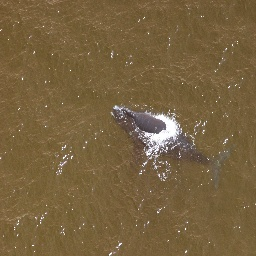

In [108]:
print(train_img_file_names[0])
print(train_labels[0])
train_images[0]

w_0.jpg


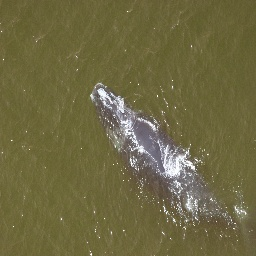

In [109]:
print(test_img_file_names[0])
test_images[0]

In [132]:
train_csv = pd.read_csv('dataset/train.csv')
train_csv = train_csv[train_csv['Image'] != 'w_7489.jpg'] # one of the images specified in the dataframe is not present in the imgs folder, so remove it.
test_csv = pd.read_csv('dataset/sample_submission.csv')
test_image_names = test_csv['Image']
test_image_names.values

array(['w_1947.jpg', 'w_11096.jpg', 'w_10973.jpg', ..., 'w_5278.jpg',
       'w_9218.jpg', 'w_9316.jpg'], dtype=object)

In [133]:
unique_labels = list(set(train_labels))
id2label = {index: value for index, value in enumerate(unique_labels)}
label2id = {value: index for index, value in enumerate(unique_labels)}

In [137]:
import pickle

# File path to save the pickle file
id2label_file_path = "dataset/id2label.pkl"
label2id_file_path = "dataset/label2id.pkl"

# Save the object to a pickle file
with open(id2label_file_path, "wb") as f:
    pickle.dump(id2label, f)
    
# Save the object to a pickle file
with open(label2id_file_path, "wb") as f:
    pickle.dump(label2id, f)

In [141]:
train_labels_integers = []
for label in train_labels:
    train_labels_integers.append(label2id[label])

train_labels_integers

[133,
 274,
 252,
 58,
 149,
 240,
 272,
 45,
 392,
 159,
 343,
 52,
 178,
 296,
 232,
 249,
 432,
 232,
 27,
 63,
 34,
 408,
 92,
 109,
 334,
 118,
 81,
 15,
 266,
 379,
 446,
 334,
 418,
 179,
 323,
 332,
 152,
 446,
 260,
 161,
 441,
 112,
 159,
 247,
 109,
 202,
 77,
 428,
 255,
 424,
 439,
 352,
 177,
 95,
 278,
 347,
 441,
 89,
 382,
 300,
 241,
 117,
 274,
 73,
 180,
 275,
 446,
 233,
 84,
 163,
 47,
 399,
 223,
 367,
 159,
 203,
 187,
 355,
 42,
 308,
 208,
 57,
 388,
 343,
 271,
 225,
 165,
 59,
 394,
 187,
 124,
 445,
 403,
 126,
 446,
 291,
 237,
 337,
 31,
 266,
 355,
 240,
 257,
 135,
 241,
 230,
 427,
 239,
 214,
 208,
 253,
 23,
 212,
 73,
 111,
 211,
 288,
 192,
 297,
 382,
 275,
 243,
 103,
 206,
 201,
 443,
 429,
 160,
 97,
 276,
 86,
 287,
 232,
 102,
 437,
 440,
 86,
 341,
 267,
 78,
 285,
 387,
 384,
 16,
 214,
 31,
 341,
 47,
 104,
 166,
 105,
 105,
 240,
 224,
 79,
 137,
 421,
 127,
 430,
 214,
 202,
 225,
 373,
 441,
 100,
 423,
 44,
 301,
 101,
 299,
 335,
 135

In [119]:
!pip install datasets transformers

In [142]:
from datasets import Dataset

# Object Format for the Vision Transformer
my_dict = {
    'image': train_images,
    'image_file_path': train_img_file_names,
    'labels': train_labels_integers
}

# Create a dataset object from the dictionary
train_dataset = Dataset.from_dict(my_dict)

# Print the dataset
print(train_dataset)
print(train_dataset[0])

Dataset({
    features: ['image', 'image_file_path', 'labels'],
    num_rows: 4543
})
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x19501332990>, 'image_file_path': 'w_1.jpg', 'labels': 133}


In [143]:
train_dataset.save_to_disk("dataset/train_dataset_for_vit")

Saving the dataset (0/1 shards):   0%|          | 0/4543 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 4543/4543 [00:01<00:00, 2432.25 examples/s]


In [127]:
from datasets import Dataset

# Object Format for Vision Transformer
my_dict = {
    'image': test_images,
    'image_file_path': test_img_file_names
}

# Create a dataset object from the dictionary
test_dataset = Dataset.from_dict(my_dict)

# Print the dataset
print(test_dataset)
print(test_dataset[0])

Dataset({
    features: ['image', 'image_file_path'],
    num_rows: 6925
})
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x19531AFF0E0>, 'image_file_path': 'w_0.jpg'}


In [128]:
test_dataset.save_to_disk("dataset/test_dataset_for_vit")

Saving the dataset (2/2 shards): 100%|██████████| 6925/6925 [00:02<00:00, 3115.86 examples/s]
